# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

# Loading dataset

In [2]:
# Creating the variables
X_train=np.loadtxt('input.csv',delimiter=',')
Y_train=np.loadtxt('labels.csv',delimiter=',')
X_test=np.loadtxt('input_test.csv',delimiter=',')
Y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [3]:
# Checking the shape
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [4]:
# Reshaping the variables
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

In [5]:
# Checking the shape
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [6]:
# Printing a single image data
X_train[1:]

array([[[[131., 128., 135.],
         [160., 157., 164.],
         [198., 192., 204.],
         ...,
         [250., 249., 247.],
         [255., 255., 253.],
         [250., 249., 245.]],

        [[140., 137., 144.],
         [127., 124., 131.],
         [120., 114., 124.],
         ...,
         [251., 253., 252.],
         [254., 255., 253.],
         [254., 255., 251.]],

        [[204., 202., 207.],
         [187., 185., 190.],
         [147., 142., 148.],
         ...,
         [249., 255., 255.],
         [238., 247., 242.],
         [232., 241., 236.]],

        ...,

        [[174., 182., 195.],
         [172., 180., 193.],
         [178., 186., 197.],
         ...,
         [ 87., 114.,  97.],
         [ 75.,  99.,  83.],
         [ 80., 105.,  86.]],

        [[166., 173., 189.],
         [164., 172., 185.],
         [172., 180., 193.],
         ...,
         [ 78., 106.,  84.],
         [ 72.,  97.,  76.],
         [ 77., 102.,  81.]],

        [[173., 180., 196.],
       

In [7]:
# Rescaling
X_train=X_train/255
X_test=X_test/255

In [8]:
# Printing a single image data
X_train[1:]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

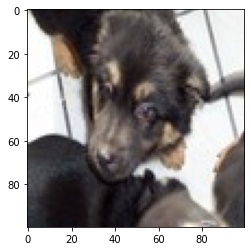

In [9]:
# Displaying a single image
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])

# Model Implementation

In [10]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    # Parameters=(no of filters,size of the filters,activation function,input shape)
    MaxPooling2D((2,2)),
    # Parameters=(size)
    Conv2D(32,(3,3),activation='relu'),
    # Parameters=(no of filters,size of the filters,activation function)
    MaxPooling2D((2,2)),
    # Parameters=(size)
    Flatten(), # Flatenning
    Dense(64,activation='relu'),
    # Parameters=(No of neurons,activation function)
    Dense(1,activation='sigmoid') #Output layer
    # It must have the same number of neurons as the output class, but for binary classification we need 1 output neuron
])

In [11]:
# Alternative method to implement the above code

# model=Sequential(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
# model.add(MaxPooling2D((2,2)))
# model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Flatten())
# model.add(Dense(64,activatoin='relu'))
# model.add(Dense(1,activation='sigmoid'))

In [12]:
# Adding cost function and backpropagation
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
# Model fitting
model.fit(X_train,Y_train,epochs=20,batch_size=64)

Epoch 1/20
32/32 [==============================] - 8s 236ms/step - loss: 0.7977 - accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 7s 234ms/step - loss: 0.6954 - accuracy: 0.5315
Epoch 3/20
32/32 [==============================] - 7s 233ms/step - loss: 0.6815 - accuracy: 0.5570
Epoch 4/20
32/32 [==============================] - 8s 236ms/step - loss: 0.6493 - accuracy: 0.6300
Epoch 5/20
32/32 [==============================] - 7s 232ms/step - loss: 0.6054 - accuracy: 0.6870
Epoch 6/20
32/32 [==============================] - 7s 233ms/step - loss: 0.5512 - accuracy: 0.7155
Epoch 7/20
32/32 [==============================] - 8s 236ms/step - loss: 0.4967 - accuracy: 0.7675
Epoch 8/20
32/32 [==============================] - 8s 238ms/step - loss: 0.4441 - accuracy: 0.7965
Epoch 9/20
32/32 [==============================] - 8s 254ms/step - loss: 0.3860 - accuracy: 0.8255
Epoch 10/20
32/32 [==============================] - 8s 258ms/step - loss: 0.3251 - accuracy: 0.8590

In [14]:
# Evaluation of the model on test dataset
model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 26ms/step - loss: 1.2469 - accuracy: 0.6750


[1.2469085454940796, 0.675000011920929]

# Making predictions

[[0.94005954]]
The model predicted that it is a  cat


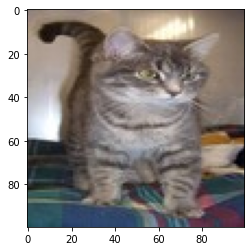

In [15]:
# Making prediction on a random image
index=random.randint(1,len(Y_test))
plt.imshow(X_test[index,:])
y_pred=model.predict(X_test[index,:].reshape(1,100,100,3))
print(y_pred)
if(y_pred<0.5):
    pred='dog'
else:
    pred='cat'
print("The model predicted that it is a ",pred)